In [ ]:
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

DB_PATH = "../../datasets/CCSMLDatabase.db"
TABLE = "master_clean"

conn = sqlite3.connect(DB_PATH)
df = pd.read_sql_query(
    f"SELECT * FROM master_clean",
    conn,
)
conn.close()

# Global style settings
plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ["Arial", "Helvetica", "DejaVu Sans"], # Standard crisp fonts
    "axes.linewidth": 1.5,               # Thicker axis lines
    "axes.spines.top": False,            # Remove top spine
    "axes.spines.right": False,          # Remove right spine
    "xtick.major.width": 1.5,            # Match tick thickness to axis
    "ytick.major.width": 1.5,
    "xtick.direction": "out",            # Ticks point outside
    "ytick.direction": "out",
    "font.size": 10,
    "axes.labelsize": 11,
    "axes.labelweight": "normal",
})

n = df.shape[0]
df.columns

Index(['id', 'tag', 'name', 'pubchemId', 'adduct', 'mass', 'z', 'ccs', 'smi',
       'inchikey', 'superclass', 'class', 'subclass'],
      dtype='object')

# m/z histogram with median/mean markers

Text(0, 1.01, 'Dataset entry count n=62043')

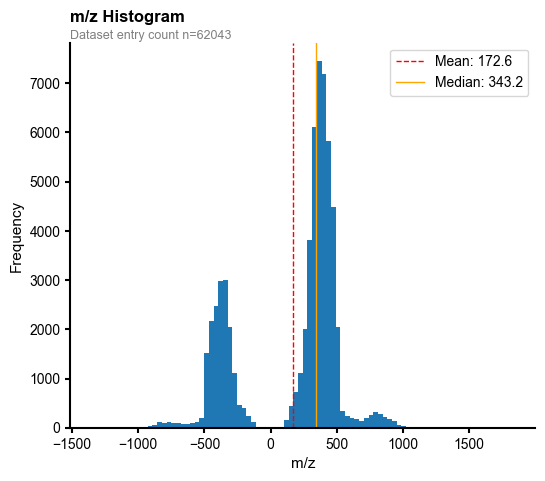

In [2]:
fig, ax = plt.subplots(figsize=(6, 5))
df["mz"] = df["mass"] / df["z"]

histogram = ax.hist(
    df["mz"],
    bins='auto'
)

#mean and median line 
ax.axvline(df["mz"].mean(), color='red', linestyle='--', linewidth=1, label=f'Mean: {df["mz"].mean():.1f}')                         
ax.axvline(df["mz"].median(), color='orange', linestyle='-', linewidth=1, label=f'Median: {df["mz"].median():.1f}')                 
ax.legend()

ax.set_xlabel('m/z')
ax.set_ylabel('Frequency')
ax.set_title('m/z Histogram', fontweight='bold', loc='left', pad=15)                                                                
ax.text(0, 1.01, f'Dataset entry count n={n}',                                                                         
        transform=ax.transAxes, fontsize=9, color='gray')

# CCS histogram with median/mean markers

Text(0, 1.01, 'Dataset entry count n=62043')

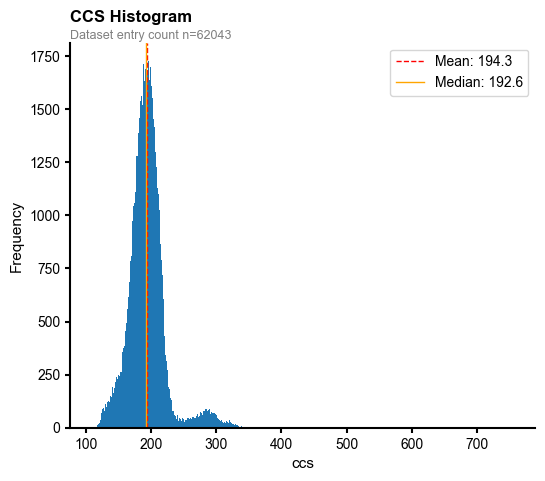

In [3]:
fig, ax = plt.subplots(figsize=(6, 5))

histogram = ax.hist(
    df["ccs"],
    bins='auto'
)

#mean and median line 
ax.axvline(df["ccs"].mean(), color='red', linestyle='--', linewidth=1, label=f'Mean: {df["ccs"].mean():.1f}')                         
ax.axvline(df["ccs"].median(), color='orange', linestyle='-', linewidth=1, label=f'Median: {df["ccs"].median():.1f}')                 
ax.legend()

ax.set_xlabel('ccs')
ax.set_ylabel('Frequency')
ax.set_title('CCS Histogram', fontweight='bold', loc='left', pad=15)                                                                
ax.text(0, 1.01, f'Dataset entry count n={n}',                                                                         
        transform=ax.transAxes, fontsize=9, color='gray')

# Plotting Out m/z against CCS For All Data Points In The Dataset. Colored By Subclass

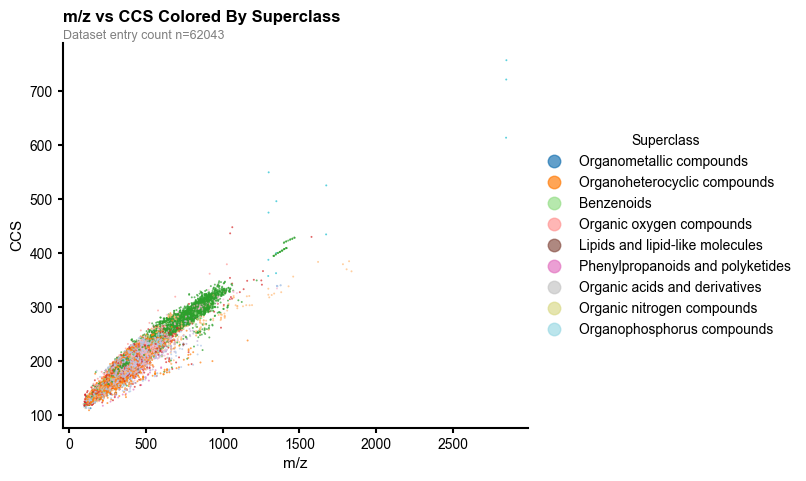

In [4]:
# Make a new column grouping nulls as 'Other'
superclass_grouped = df['superclass'].fillna('Other')

codes, uniques = pd.factorize(superclass_grouped)
fig, ax = plt.subplots(figsize=(6, 5))
scatter = ax.scatter(
    df['mass'], df['ccs'],
    c=codes,
    cmap='tab20',
    alpha=0.7,
    s=2,
    edgecolors='none'  # Removes outlines for cleaner look at high density
)
ax.set_xlabel('m/z')
ax.set_ylabel('CCS')
ax.set_title('m/z vs CCS Colored By Superclass', fontweight='bold', loc='left', pad=15)                                                                
ax.text(0, 1.01, f'Dataset entry count n={n}',                                                                         
        transform=ax.transAxes, fontsize=9, color='gray')    

legend = ax.legend(
    *scatter.legend_elements(),
    title="Superclass",
    loc="center left",
    bbox_to_anchor=(1, 0.5),  # Moves legend outside the plot
    markerscale=1.5,
    frameon=False,
)

# Update legend labels to actual names (now includes 'Other' for nulls)
for i, text in enumerate(legend.get_texts()):
    text.set_text(uniques[i])

# plt.savefig('mz_ccs_plot.pdf', dpi=300, bbox_inches='tight')
plt.show()

# Plotting Out m/z against CCS For All Data Points In The Dataset. Colored By Chem Labs

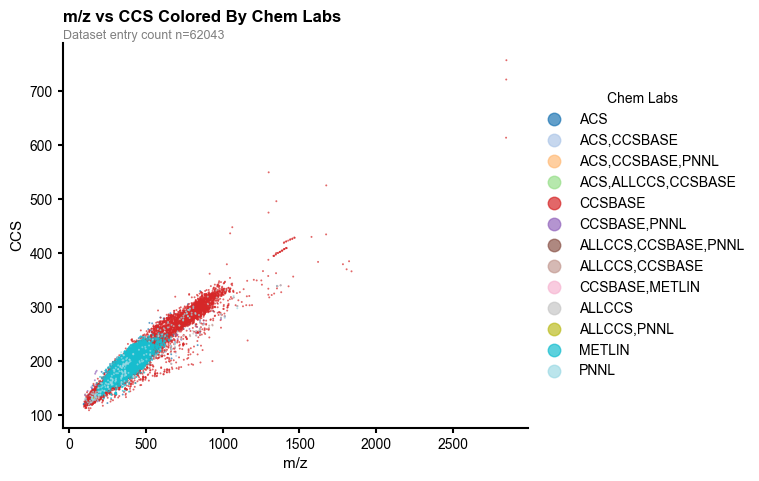

In [5]:
# Make a new column grouping nulls as 'Other'
# group it by tag/lab
tag_grouped = df['tag'].fillna('Other')

codes, uniques = pd.factorize(tag_grouped)

fig, ax = plt.subplots(figsize=(6, 5))
scatter = ax.scatter(
    df['mass'], df['ccs'],
    c=codes,
    cmap='tab20',
    alpha=0.7,
    s=2,
    edgecolors='none'  # Removes outlines for cleaner look at high density
)
ax.set_xlabel('m/z')
ax.set_ylabel('CCS')
ax.set_title('m/z vs CCS Colored By Chem Labs', fontweight='bold', loc='left', pad=15)                                                                
ax.text(0, 1.01, f'Dataset entry count n={n}',                                                                         
        transform=ax.transAxes, fontsize=9, color='gray')    

legend = ax.legend(
    *scatter.legend_elements(),
    title="Chem Labs",
    loc="center left",
    bbox_to_anchor=(1, 0.5),  # Moves legend outside the plot
    markerscale=1.5,
    frameon=False,
)

# Update legend labels to actual names (now includes 'Other' for nulls)
for i, text in enumerate(legend.get_texts()):
    text.set_text(uniques[i])
plt.show()